In [1]:
# import dependencies for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Data loading for data analysis
transaction= pd.read_excel("/content/transaction.xlsx")
customer_demo= pd.read_excel("/content/customer demographic.xlsx")
customer_add= pd.read_excel("/content/customer address (1).xlsx")


In [3]:
#checking the head of the data
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
#print shape and information about data
print(transaction.shape)
print(transaction.info())

(20000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_d

In [5]:
#checking the order status value counts
transaction["order_status"].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [6]:
#checking the product line value counts
transaction["product_line"].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [7]:
#checking the product class value counts
transaction["product_class"].value_counts()


medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [8]:
transaction['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [9]:
#checking the product id
transaction["product_id"].value_counts()

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

In [10]:
#checking the duplicated data in daat frame
transaction.duplicated().sum()

0

In [11]:
#removing the unnessary columns and showing the head of data frame
transaction.drop(columns= ["list_price", "product_id"], axis =1, inplace= True)
transaction.head()

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
0,1,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,53.62,41245.0
1,2,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,388.92,41701.0
2,3,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,248.82,36361.0
3,4,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,381.10,36145.0
4,5,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,709.48,42226.0


In [12]:
#rename the columns with total cost
transaction.rename(columns= {"product_first_sold_date":"Total_cost"}, inplace= True)

Customer demographic data analysis

In [13]:
#checking the data frame for customer demographic
customer_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [14]:
#removing the unnessary dataframe
customer_demo.drop(columns= ["first_name","last_name", "deceased_indicator"], axis=1, inplace= True)

In [15]:
#rename the past_3_years_bike_related_purchases to bike sold
customer_demo.rename(columns = {'past_3_years_bike_related_purchases':'bike_sold'}, inplace = True)

In [16]:
#showing the head of data frame
customer_demo.head()

,customer_id,gender,bike_sold,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,No,7.0
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,Yes,8.0


customer address analysis

In [17]:
#showing customer dataframe head
customer_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [18]:
#checking for null for customer address
customer_add.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [19]:
#checking value count for property evaluation
customer_add["property_valuation"].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

In [20]:

#dropping the country columns as it is same throughout the dataframe
customer_add.drop(["country"], axis= 1, inplace= True)

Merge 3 data frame for analysis

In [21]:
#merging the data frame (customer_demo and customer_add based on customer_id
new_df= pd.merge(customer_demo, customer_add, on= "customer_id", how= "inner")

In [22]:
#merging the newdf dataframe on transaction based on customer id
data= pd.merge(new_df, transaction, on="customer_id", how= "inner")

In [23]:
#showing the head of data after merging all 3 data frame
data.head()

,customer_id,gender,bike_sold,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,...,transaction_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,standard_cost,Total_cost
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,060 Morning Avenue,...,94,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,125.07,38482.0
1,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,060 Morning Avenue,...,3765,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,826.51,39526.0
2,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,060 Morning Avenue,...,5157,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1531.42,37823.0
3,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,060 Morning Avenue,...,9785,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,270.30,37873.0
4,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,060 Morning Avenue,...,13424,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,53.62,38573.0


In [24]:
#showing the shape of data frame
data.shape

(19959, 23)

In [25]:
#checking for job industry category
data["job_title"].value_counts()

Social Worker                           226
Business Systems Development Analyst    221
Assistant Professor                     212
Legal Assistant                         212
Executive Secretary                     208
                                       ... 
Administrative Assistant I               15
Health Coach III                         14
Geologist II                             11
Research Assistant III                    9
Developer I                               7
Name: job_title, Length: 195, dtype: int64

In [26]:
#Droping the product id as it not nessary of data analysis
data.drop(columns= ["job_industry_category"], axis = 1, inplace= True)

In [27]:
#checking for data frame
data.head()

,customer_id,gender,bike_sold,DOB,job_title,wealth_segment,owns_car,tenure,address,postcode,...,transaction_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,standard_cost,Total_cost
0,1,F,93,1953-10-12,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,2016,...,94,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,125.07,38482.0
1,1,F,93,1953-10-12,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,2016,...,3765,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,826.51,39526.0
2,1,F,93,1953-10-12,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,2016,...,5157,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1531.42,37823.0
3,1,F,93,1953-10-12,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,2016,...,9785,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,270.30,37873.0
4,1,F,93,1953-10-12,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,2016,...,13424,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,53.62,38573.0


In [28]:
#describing all numerical cloumns in data frame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,19959.0,1741.023699,1009.396333,1.00,864.00,1740.00,2615.0,3500.00
bike_sold,19959.0,48.752793,28.616982,0.00,24.00,48.00,73.0,99.00
tenure,19513.0,10.677651,5.672409,1.00,6.00,11.00,15.0,22.00
postcode,19959.0,2987.164587,851.224326,2000.00,2200.00,2767.00,3752.0,4883.00
property_valuation,19959.0,7.516158,2.825401,1.00,6.00,8.00,10.0,12.00
transaction_id,19959.0,9997.858710,5773.434376,1.00,4998.50,9997.00,14995.5,20000.00
online_order,19600.0,0.500765,0.500012,0.00,0.00,1.00,1.0,1.00
standard_cost,19765.0,555.948145,405.869990,7.21,215.14,507.58,795.1,1759.85
Total_cost,19765.0,38197.905338,2874.918932,33259.00,35667.00,38216.00,40672.0,42710.00


In [29]:
#checking the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19959 entries, 0 to 19958
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         19959 non-null  int64         
 1   gender              19959 non-null  object        
 2   bike_sold           19959 non-null  int64         
 3   DOB                 19513 non-null  datetime64[ns]
 4   job_title           17580 non-null  object        
 5   wealth_segment      19959 non-null  object        
 6   owns_car            19959 non-null  object        
 7   tenure              19513 non-null  float64       
 8   address             19959 non-null  object        
 9   postcode            19959 non-null  int64         
 10  state               19959 non-null  object        
 11  property_valuation  19959 non-null  int64         
 12  transaction_id      19959 non-null  int64         
 13  transaction_date    19959 non-null  datetime64

In [30]:
#checking the Date of birth
data['DOB'].value_counts()

1978-01-30    48
1962-12-17    33
1968-07-28    30
1999-07-28    27
1978-08-19    24
              ..
1977-03-23     1
1992-10-03     1
1988-05-06     1
1963-12-18     1
1965-03-26     1
Name: DOB, Length: 3046, dtype: int64

In [31]:
#getting age from date of birth using datetime format
import datetime
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')

now = pd.to_datetime('now')
data["Age"]= (now - data['DOB']).astype('<m8[Y]')
data["Age"]


0        70.0
1        70.0
2        70.0
3        70.0
4        70.0
         ... 
19954    56.0
19955    56.0
19956    56.0
19957    56.0
19958    56.0
Name: Age, Length: 19959, dtype: float64

In [32]:
#drop DOB columns as it is no use for EDA
data.drop(["DOB"], axis= 1, inplace= True)

In [33]:
#changing the transaction date from datetime to str format
import datetime

dateTimeStr= str(data["transaction_date"])
print(type(dateTimeStr))

<class 'str'>


In [34]:
#changing the transaction_date columns into Year, Month and day columns
data['Year'] = pd.DatetimeIndex(data['transaction_date']).year
data['Month']= pd.DatetimeIndex(data['transaction_date']).month
data['Day']= pd.DatetimeIndex(data['transaction_date']).day

In [35]:
data.head()

,customer_id,gender,bike_sold,job_title,wealth_segment,owns_car,tenure,address,postcode,state,...,brand,product_line,product_class,product_size,standard_cost,Total_cost,Age,Year,Month,Day
0,1,F,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,2016,New South Wales,...,OHM Cycles,Standard,medium,medium,125.07,38482.0,70.0,2017,12,23
1,1,F,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,2016,New South Wales,...,Solex,Standard,medium,medium,826.51,39526.0,70.0,2017,4,6
2,1,F,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,2016,New South Wales,...,Trek Bicycles,Road,low,small,1531.42,37823.0,70.0,2017,5,11
3,1,F,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,2016,New South Wales,...,Norco Bicycles,Standard,medium,medium,270.30,37873.0,70.0,2017,1,5
4,1,F,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,2016,New South Wales,...,Solex,Standard,medium,medium,53.62,38573.0,70.0,2017,2,21


In [36]:
data.isnull().sum()

customer_id              0
gender                   0
bike_sold                0
job_title             2379
wealth_segment           0
owns_car                 0
tenure                 446
address                  0
postcode                 0
state                    0
property_valuation       0
transaction_id           0
transaction_date         0
online_order           359
order_status             0
brand                  194
product_line           194
product_class          194
product_size           194
standard_cost          194
Total_cost             194
Age                    446
Year                     0
Month                    0
Day                      0
dtype: int64

Replacing all the null value with mode and mean

In [37]:
# drop the Year columns as it same for all columns
data.drop(["Year"], axis= 1, inplace= True)

In [38]:

#replacing null value of online order with mean method
data["online_order"].fillna(value=data["online_order"].mean(), inplace=True)

In [39]:

#replacing null value of age with mean method
data["Age"].fillna(value=data["Age"].mean(), inplace=True)

In [40]:
#finding the mean value and replacing mean for nan
mean_value=data["tenure"].mean()
print('Mean of values in tenture is:')
print(mean_value)
data= data.dropna(subset=["tenure"])

Mean of values in tenture is:
10.677650796904627


In [41]:
# droping all null value for job_industry_category and product first sold date
# data= data.dropna(subset= ["bike_sold"])
data= data.dropna(subset= ["brand"])
data= data.dropna(subset= ["product_line"])
data= data.dropna(subset= ["product_class"])
data= data.dropna(subset= ["product_size"])
data= data.dropna(subset= ["standard_cost"])
data= data.dropna(subset= ["Total_cost"])

In [42]:
#replacing null value with mode of job-related category
data['job_title'].fillna(data['job_title'].mode(), inplace=True)

In [43]:
#checking the null value
data.isnull().sum()

customer_id              0
gender                   0
bike_sold                0
job_title             2312
wealth_segment           0
owns_car                 0
tenure                   0
address                  0
postcode                 0
state                    0
property_valuation       0
transaction_id           0
transaction_date         0
online_order             0
order_status             0
brand                    0
product_line             0
product_class            0
product_size             0
standard_cost            0
Total_cost               0
Age                      0
Month                    0
Day                      0
dtype: int64

Past 3 years bike related purchased

In [44]:
#value counts for past 3 years bike related purchased
data["bike_sold"].value_counts().head(10)

16    279
80    267
2     252
13    250
19    248
48    246
20    245
53    245
67    243
98    241
Name: bike_sold, dtype: int64

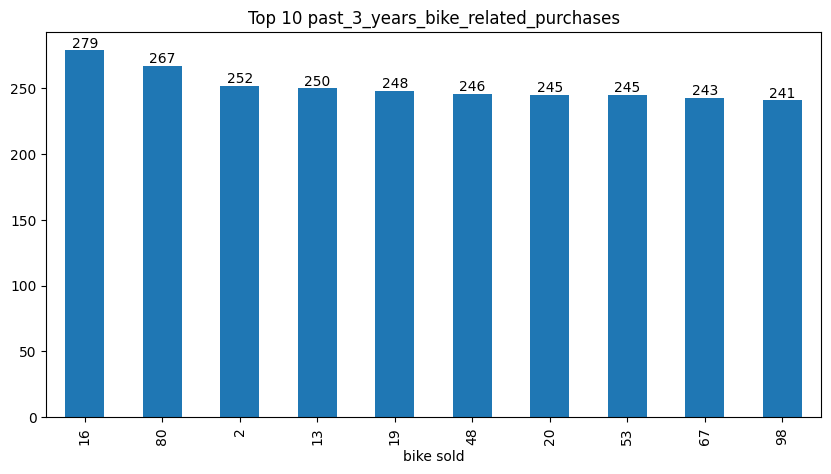

In [45]:
# top 10 bike related purchase
plt.figure(figsize=(10,5))
ax=data.groupby(['bike_sold'])['bike_sold'].count().sort_values(ascending=False).head(10).plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('bike sold')
plt.title('Top 10 past_3_years_bike_related_purchases')
plt.show()



Brand Columns Analysis

In [46]:
#value counts for brand columns
data["brand"].value_counts()

Solex             4171
Giant Bicycles    3236
WeareA2B          3203
OHM Cycles        2976
Trek Bicycles     2914
Norco Bicycles    2827
Name: brand, dtype: int64

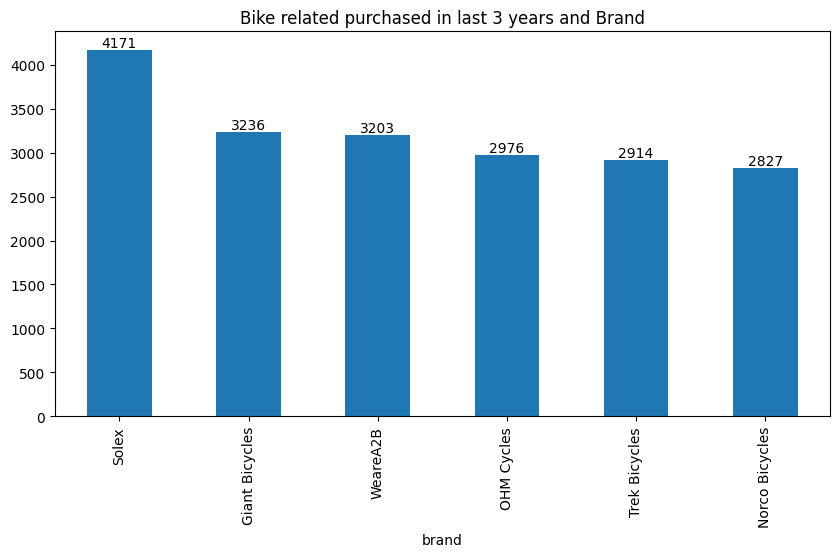

In [47]:
#plotting the bar graph for past_3_years_bike_related_purchases  and brand
plt.figure(figsize=(10,5))
ax=data.groupby(['brand'])['bike_sold'].count().sort_values(ascending=False).head(10).plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('brand')
plt.title('Bike related purchased in last 3 years and Brand')
plt.show()

Gender columns Analysis

In [48]:
#checking the gender columns for EDA
data["gender"].value_counts()

Female    9890
Male      9413
F           11
Femal        7
M            6
Name: gender, dtype: int64

In [49]:
#merging all female into one columns
data['gender'] = data['gender'].replace(['F', 'Femal'],'Female')

In [50]:

#merging all male into one column
data['gender'] = data['gender'].replace(['M'],'Male')

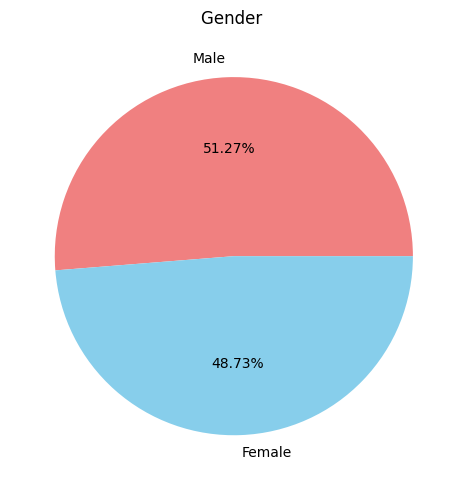

In [51]:
#gender columns in pie chart with labels and percentage
plt.figure(figsize=(5,5))
labels= ['Male', 'Female']
colors=['lightcoral', 'skyblue']
plt.pie(x = data["gender"].value_counts(), labels=labels,colors=colors,
        autopct="%1.2f%%", explode=[0, 0])
plt.title("Gender ")
plt.tight_layout()
plt.show()

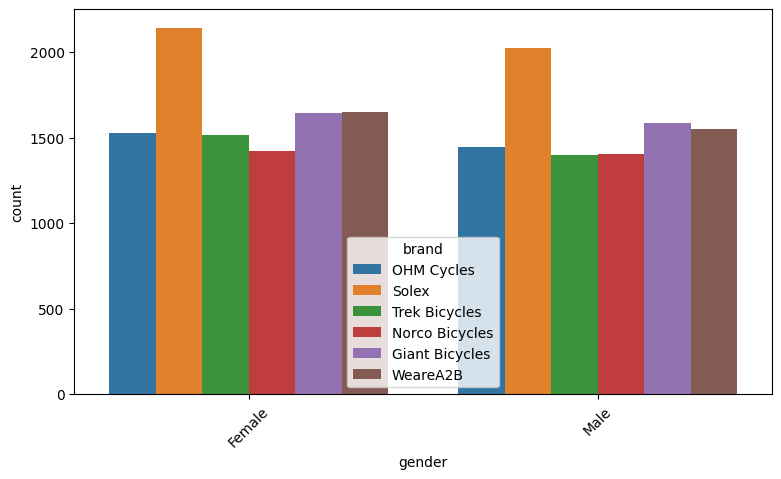

In [52]:
plt.figure(figsize=(9,5))
sns.countplot(data=data,x='gender',hue='brand',dodge=True)
plt.xticks(rotation=45)
plt.show()

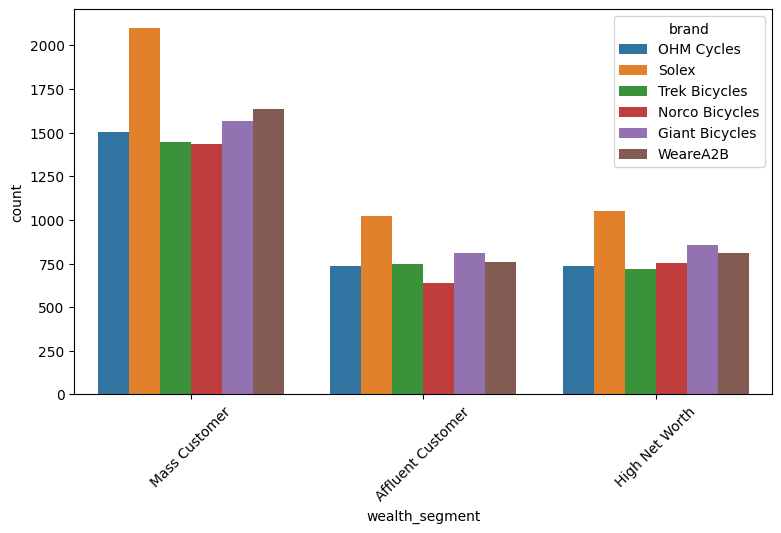

In [53]:
plt.figure(figsize=(9,5))
sns.countplot(data=data,x='wealth_segment',hue='brand',dodge=True)
plt.xticks(rotation=45)
plt.show()


Car own or not columns Analysis

In [54]:
data["owns_car"].value_counts()

Yes    9698
No     9629
Name: owns_car, dtype: int64

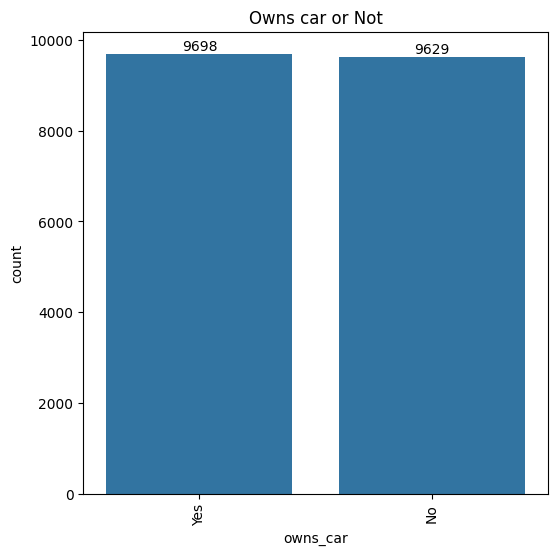

In [55]:
# car owns or not columns in countplot with labels
plt.figure(figsize=(6,6))
ax= sns.countplot(data= data, x= "owns_car")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Owns car or Not")
plt.show()

#Tenure Analysis

In [56]:
#checking the tenure columns and showing the top 5 rows
data["tenure"].value_counts().head()

7.0     1180
5.0     1086
11.0    1077
16.0    1057
12.0    1053
Name: tenure, dtype: int64

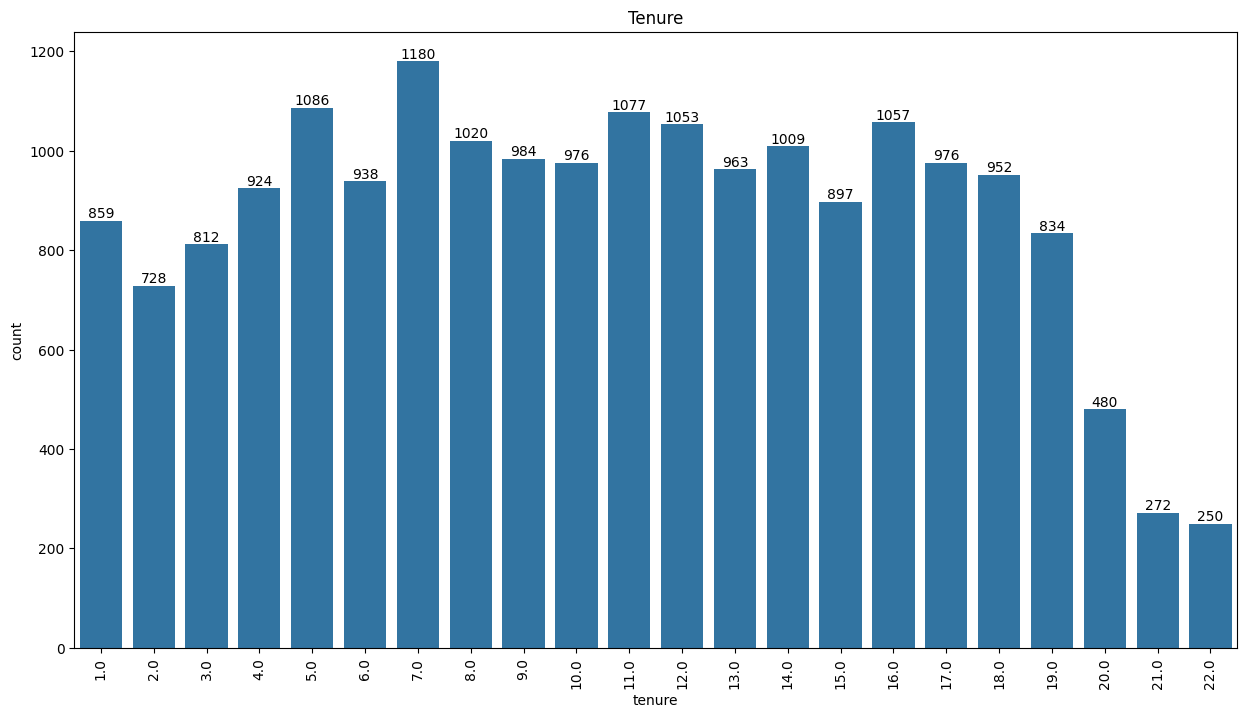

In [57]:
#plotting the count plot for tenure columns
plt.figure(figsize=(15, 8))
ax= sns.countplot(data= data, x= "tenure")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title("Tenure")
plt.show()

Customer Address

In [58]:
#showing the value counts for address cloumns
data["address"].value_counts().head(10)

3 Talisman Place              14
8142 Tomscot Drive            14
3 Mariners Cove Terrace       14
4297 Emmet Lane               14
567 Scott Park                14
3126 Butterfield Pass         13
7916 Clyde Gallagher Place    13
9427 Tennyson Plaza           13
80302 Stang Parkway           13
78258 Hanover Plaza           13
Name: address, dtype: int64

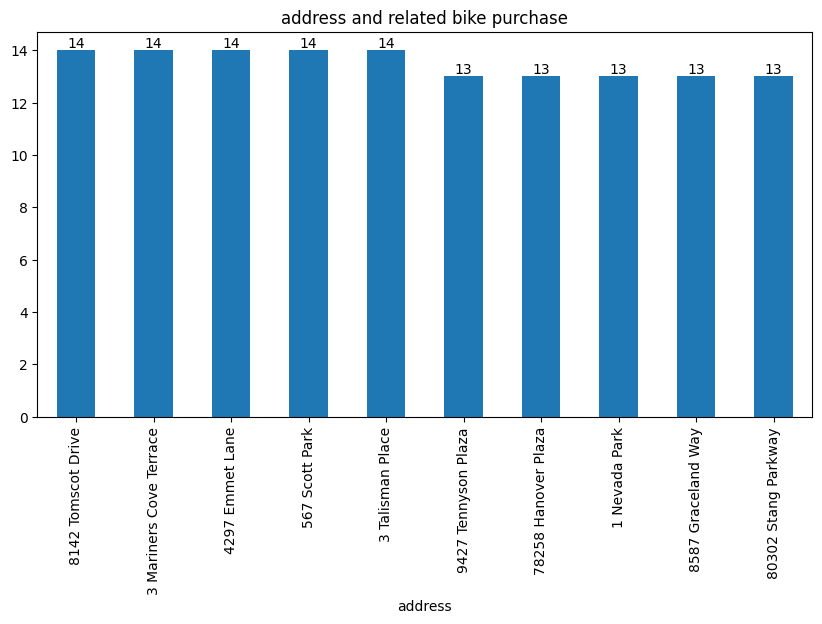

In [59]:
#showing the top 10 customer address for maximun bike related purchased
plt.figure(figsize=(10,5))
ax=data.groupby(['address'])['bike_sold'].count().sort_values(ascending=False).head(10).plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('address')
plt.title('address and related bike purchase')
plt.show()

Online_Order for bike related purchased

In [60]:
#value counts for online order columns
data["online_order"].value_counts()

1.000000    9502
0.000000    9476
0.500765     349
Name: online_order, dtype: int64

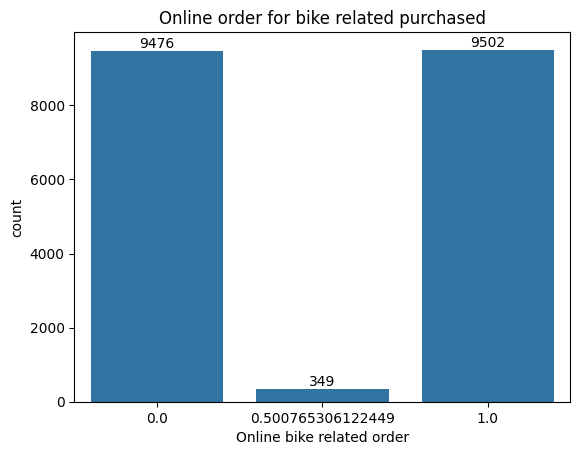

In [61]:
#countplot for online_order columns
ax= sns.countplot(data= data, x= "online_order")
ax.bar_label(ax.containers[0])
plt.title("Online order for bike related purchased")
plt.xlabel("Online bike related order")
plt.show()

Order status and bike releted product purchased

In [62]:
#value counts for order status columns
data["order_status"].value_counts()

Approved     19152
Cancelled      175
Name: order_status, dtype: int64

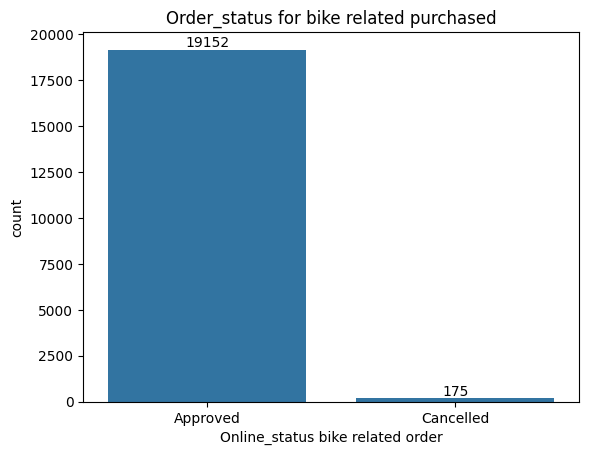

In [63]:
#countplot for order_status columns
ax= sns.countplot(data= data, x= "order_status")
ax.bar_label(ax.containers[0])

plt.title("Order_status for bike related purchased")
plt.xlabel("Online_status bike related order")
plt.show()

Brand and bike related purchased

In [64]:
#checking brand value counts
data["brand"].value_counts()

Solex             4171
Giant Bicycles    3236
WeareA2B          3203
OHM Cycles        2976
Trek Bicycles     2914
Norco Bicycles    2827
Name: brand, dtype: int64

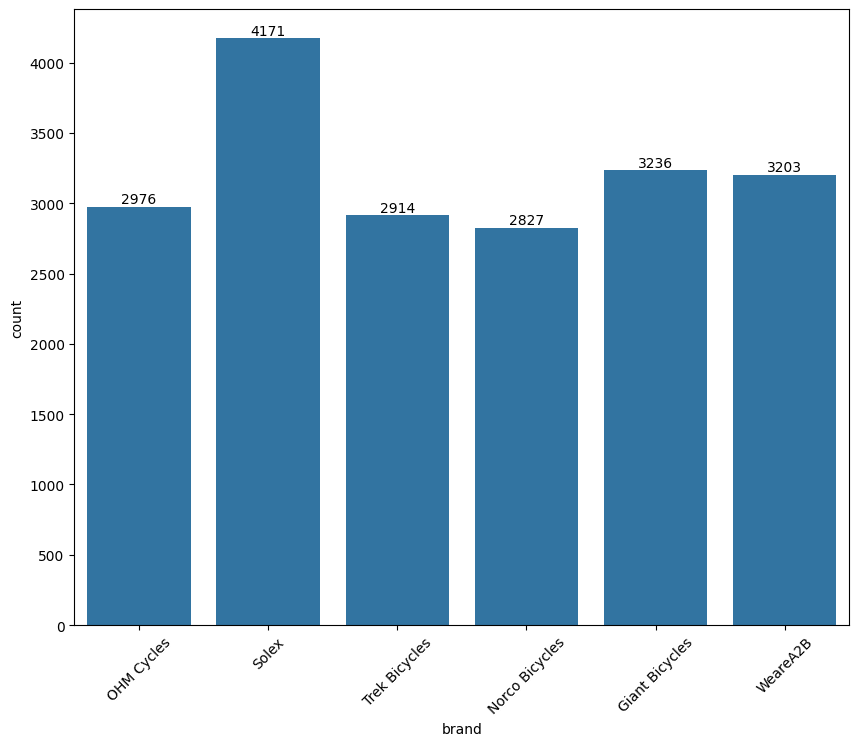

In [65]:
#countplot for wealth brand columns
plt.figure(figsize=(10, 8))
ax= sns.countplot(data= data, x= "brand")
ax.bar_label(ax.containers[0])
plt.xticks(rotation= 45)
plt.show()

product line and bike related purchased

In [66]:
#value counts for product line
data["product_line"].value_counts()

Standard    13851
Road         3871
Touring      1193
Mountain      412
Name: product_line, dtype: int64

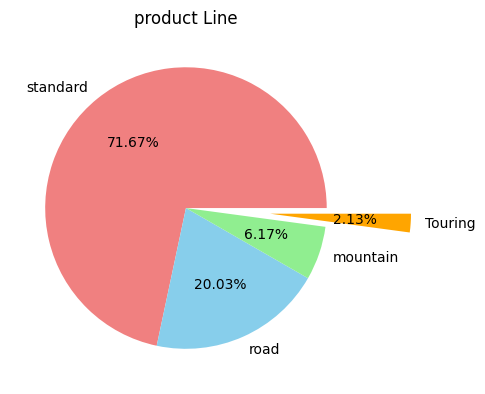

In [67]:
#countplot for product line columns
plt.figure(figsize=(5,5))
labels= ['standard', 'road', 'mountain', 'Touring']
colors=['lightcoral', 'skyblue','lightgreen', 'orange']
plt.pie(x = data["product_line"].value_counts(), labels=labels,colors=colors,
        autopct="%1.2f%%", explode=[0, 0, 0,0.6])
plt.title("product Line")
plt.tight_layout()
plt.show()

Job releted colums with bike related purchase

In [68]:
data.columns

Index(['customer_id', 'gender', 'bike_sold', 'job_title', 'wealth_segment',
       'owns_car', 'tenure', 'address', 'postcode', 'state',
       'property_valuation', 'transaction_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'standard_cost', 'Total_cost', 'Age',
       'Month', 'Day'],
      dtype='object')

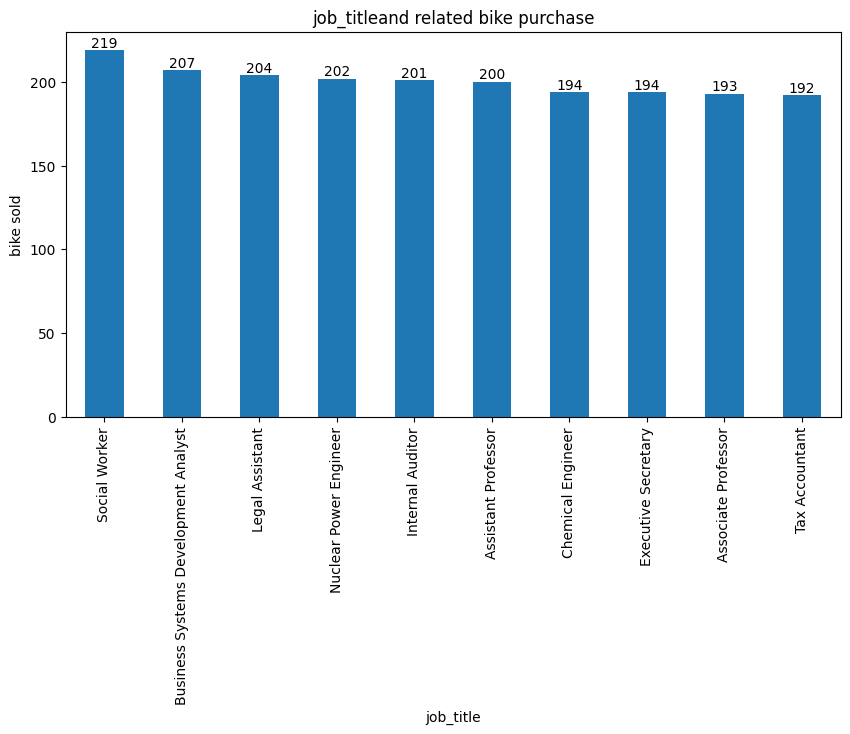

In [69]:
#building barplot for job_industry_category and bike related purchase
plt.figure(figsize=(10,5))
ax= data.groupby(['job_title'])['bike_sold'].count().sort_values(ascending=False).head(10).plot.bar()
ax.bar_label(ax.containers[0])
plt.ylabel('bike sold')
plt.title('job_titleand related bike purchase')
plt.show()

Product class and product size

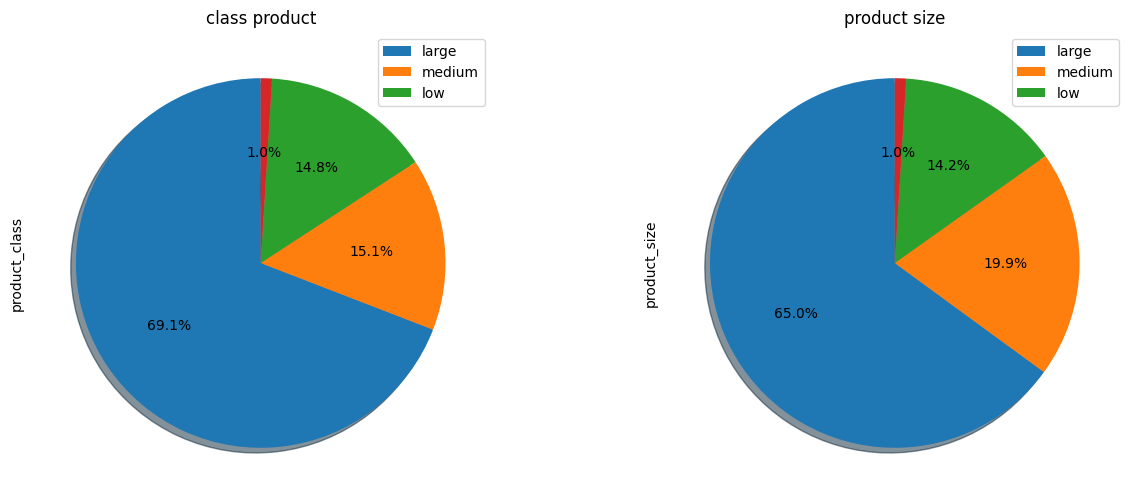

In [70]:
fig2 = plt.figure()
ax5 = fig2.add_subplot(121)
ax6 = fig2.add_subplot(122)

labels_list1 = 'large', 'medium', 'low'
labels_list2 = 'large', 'medium', 'low'

transaction['product_class'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('class product')
ax5.legend(labels=labels_list1,loc='upper right')

transaction['product_size'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,ax=ax6)
ax6.set_title('product size')
ax6.legend(labels=labels_list2,loc='upper right')
plt.show()

Wealth segment columns with barplot

In [71]:
#checking the waelth segment columns
data["wealth_segment"].value_counts()

Mass Customer        9682
High Net Worth       4925
Affluent Customer    4720
Name: wealth_segment, dtype: int64

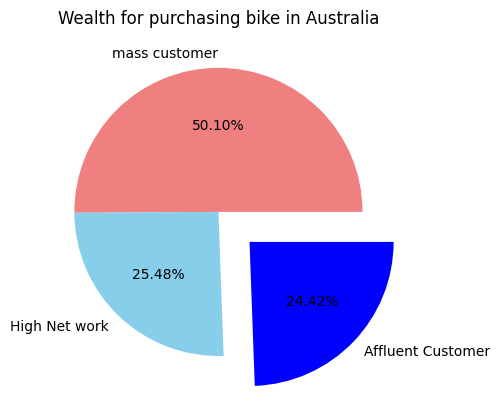

In [72]:
#countplot for wealth segment and related purchased columns

plt.figure(figsize=(5,5))
labels= ['mass customer', 'High Net work', 'Affluent Customer']
colors=['lightcoral', 'skyblue', 'blue']
plt.pie(x = data["wealth_segment"].value_counts(), labels=labels,colors=colors,
        autopct="%1.2f%%", explode=[0, 0, 0.3])
plt.title("Wealth for purchasing bike in Australia")
plt.tight_layout()
plt.show()

Age Columns

In [73]:
#checking the value counts for age columns
data["Age"].value_counts().head()

46.0    1105
45.0    1071
47.0     765
49.0     744
43.0     616
Name: Age, dtype: int64

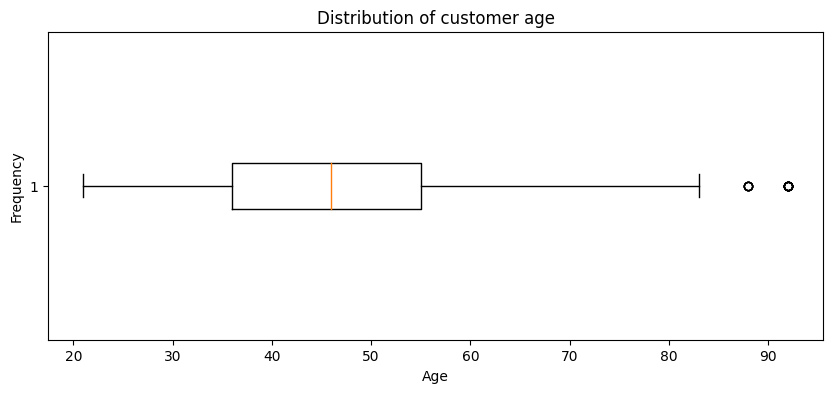

In [74]:
#building boxplot to find outlier
plt.figure(figsize= (10, 4))
plt.boxplot(data["Age"], vert= False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of customer age")
plt.show()

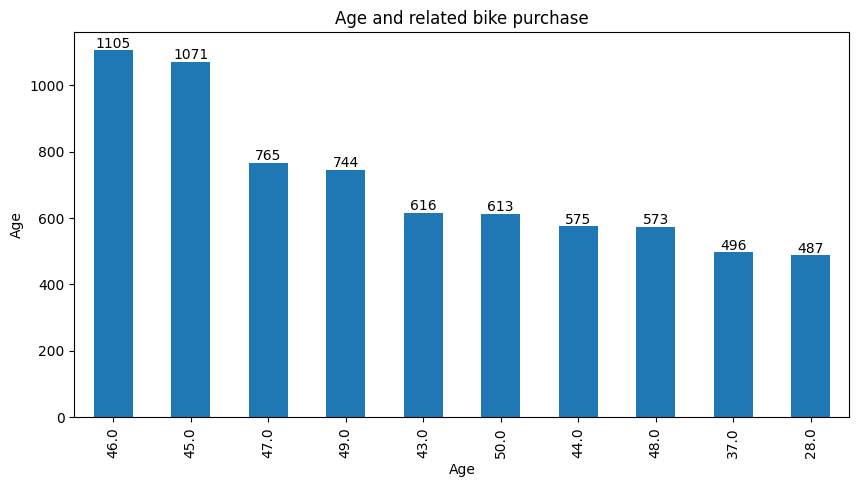

In [75]:
#building barplot for age and bike related purchase
plt.figure(figsize=(10,5))
ax= data.groupby(['Age'])['bike_sold'].count().sort_values(ascending=False).head(10).plot.bar()
ax.bar_label(ax.containers[0])
plt.ylabel('Age')
plt.title('Age and related bike purchase')
plt.show()

EDA On State Columns

In [76]:
#merging all NSW into New South Wales
data['state'] = data['state'].replace(['NSW'],'New South Wales')

In [77]:
#checking value count for state columns
data["state"].value_counts()

New South Wales    10327
VIC                 4402
QLD                 4135
Victoria             463
Name: state, dtype: int64

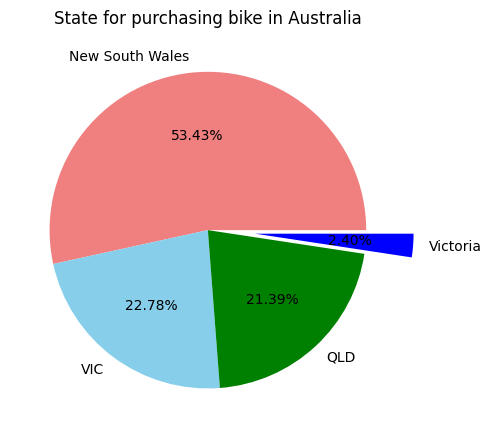

In [78]:
#State columns in pie chart with labels and percentage
plt.figure(figsize=(5,5))
labels= ['New South Wales', 'VIC', "QLD", "Victoria"]
colors=['lightcoral', 'skyblue', "green", "blue"]
plt.pie(x = data["state"].value_counts(), labels=labels,colors=colors,
        autopct="%1.2f%%", explode=[0, 0, 0, 0.3])
plt.title("State for purchasing bike in Australia")
plt.tight_layout()
plt.show()

Postal Code Columns

In [79]:
#value counts for postcode columns
data["postcode"].value_counts().head(10)

2153    162
2155    133
2170    132
2770    131
3977    127
2763    125
2145    117
2065    115
2166    109
4300    105
Name: postcode, dtype: int64

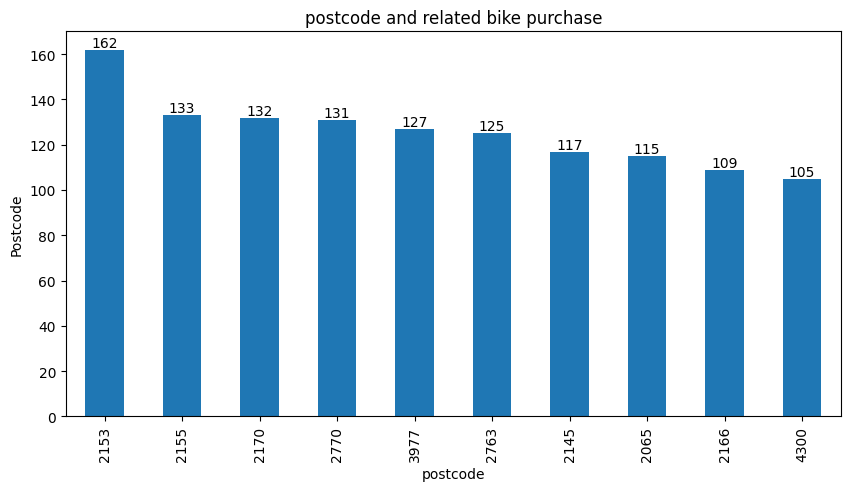

In [80]:
#building barplot for postcode and bike related purchase
plt.figure(figsize=(10,5))
ax= data.groupby(['postcode'])['bike_sold'].count().sort_values(ascending=False).head(10).plot.bar()
ax.bar_label(ax.containers[0])
plt.ylabel('Postcode')
plt.title('postcode and related bike purchase')
plt.show()

Standard cost columns analysis

In [81]:
#top 10 value counts standard cost columns
data["standard_cost"].value_counts().head(10)

388.92    456
954.82    391
53.62     272
161.60    227
677.48    227
933.84    225
507.58    225
260.14    223
598.76    222
459.71    217
Name: standard_cost, dtype: int64

Text(0.5, 1.0, 'standard cost and related purchased')

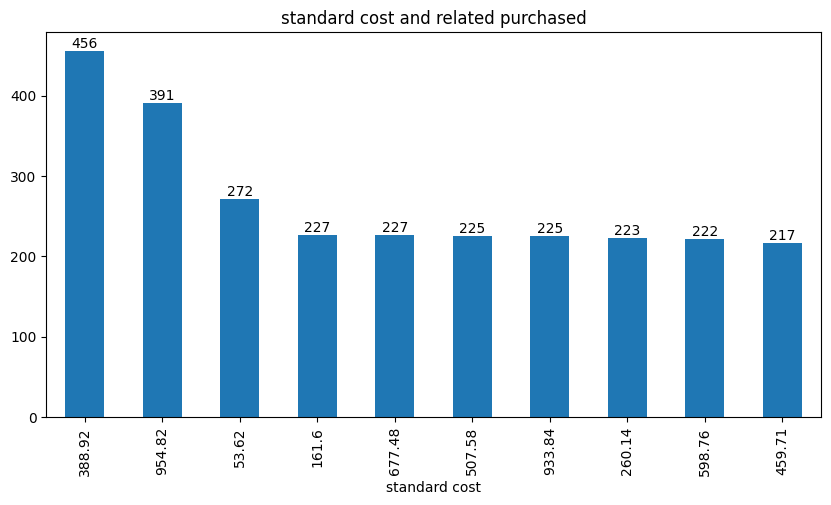

In [82]:
#top 10 standard cost with bar chart
plt.figure(figsize=(10,5))
ax=data.groupby(['standard_cost'])['bike_sold'].count().sort_values(ascending=False).head(10).plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('standard cost')
plt.title('standard cost and related purchased')

Cost collection columns

In [83]:
#top 10 value counts standard cost columns
data["Total_cost"].value_counts().head(10)

33879.0    227
41064.0    225
37823.0    219
39880.0    217
38216.0    215
40336.0    213
39526.0    212
38482.0    211
42560.0    211
38002.0    210
Name: Total_cost, dtype: int64

Text(0.5, 1.0, 'cost collection and related purchased')

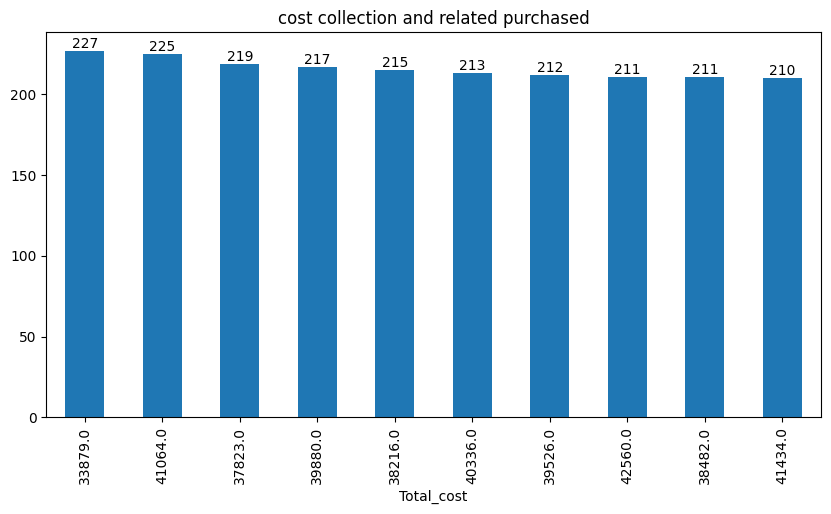

In [84]:
#top 10 standard cost with bar chart
plt.figure(figsize=(10,5))
ax=data.groupby(['Total_cost'])['bike_sold'].count().sort_values(ascending=False).head(10).plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('Total_cost')
plt.title('cost collection and related purchased')

<Axes: xlabel='standard_cost', ylabel='Density'>

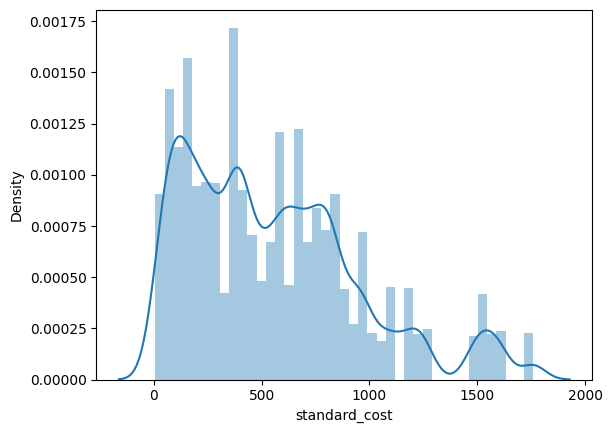

In [85]:
#Using Distplot for standard cost
sns.distplot(data.standard_cost)

Month Colums

In [86]:
#value count for month columns
data['Month'].value_counts()

10    1719
8     1690
7     1650
5     1638
1     1620
11    1617
4     1595
3     1589
2     1584
12    1582
6     1523
9     1520
Name: Month, dtype: int64

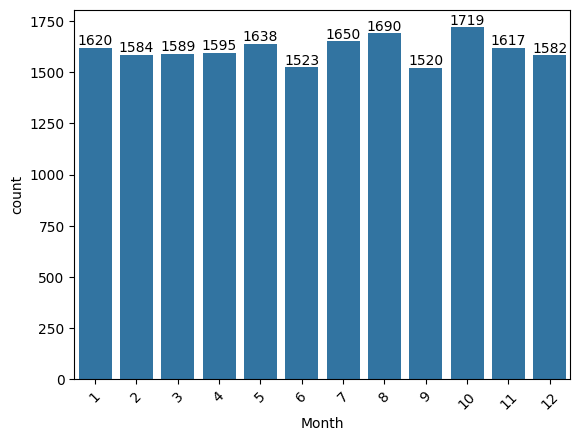

In [87]:
#ploting the month column in countplot
ax= sns.countplot(data= data, x= "Month")
ax.bar_label(ax.containers[0])
plt.xticks(rotation= 45)
plt.show()

In [88]:
data.describe()

,customer_id,bike_sold,tenure,postcode,property_valuation,transaction_id,online_order,standard_cost,Total_cost,Age,Month,Day
count,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000,19327.000000
mean,1740.787499,48.937135,10.680499,2988.643245,7.516014,9988.938635,0.500686,555.749864,38202.130025,45.935634,6.518032,15.564806
std,1009.743005,28.644584,5.672739,852.076050,2.826879,5773.346308,0.495477,405.716005,2873.717860,12.602669,3.449398,8.678776
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,7.210000,33259.000000,21.000000,1.000000,1.000000
25%,860.000000,24.000000,6.000000,2200.000000,6.000000,4994.500000,0.000000,215.140000,35667.000000,36.000000,4.000000,8.000000
50%,1738.000000,48.000000,11.000000,2767.000000,8.000000,9985.000000,0.500765,507.580000,38216.000000,46.000000,7.000000,16.000000
75%,2615.000000,73.000000,15.000000,3752.000000,10.000000,14986.500000,1.000000,795.100000,40672.000000,55.000000,10.000000,23.000000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,1.000000,1759.850000,42710.000000,92.000000,12.000000,31.000000


Finding Correlation between columns

<Axes: >

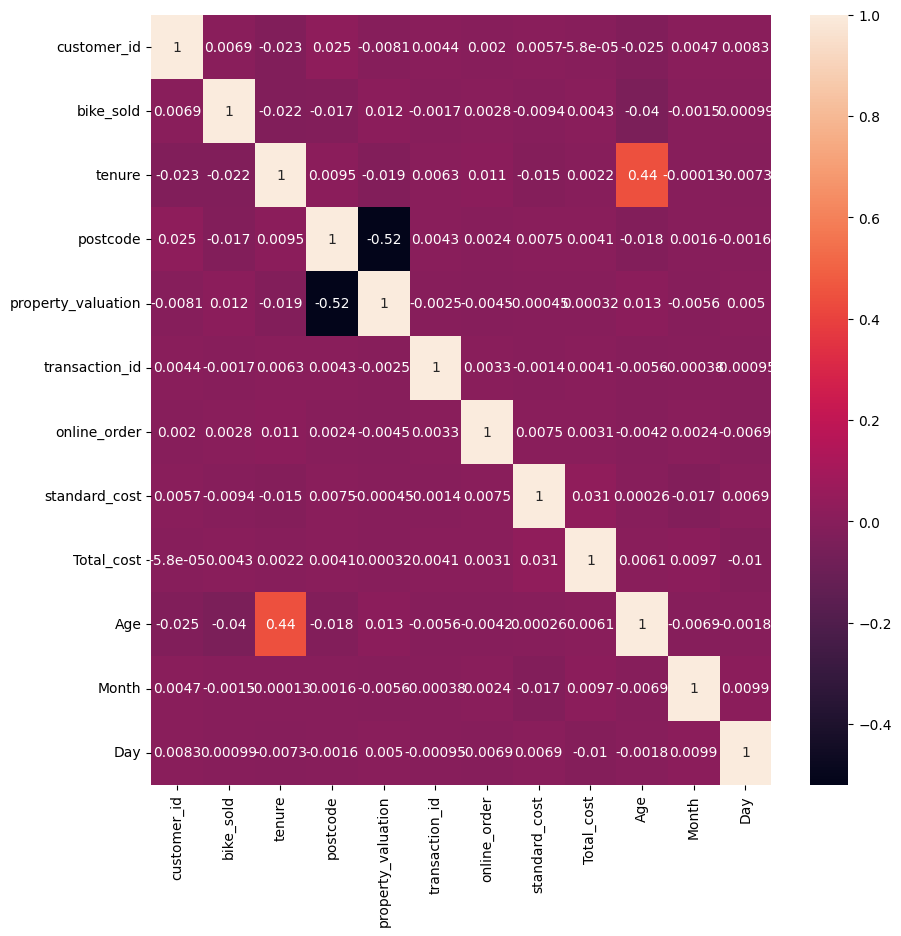

In [89]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True)

Days Columns Analysis

In [90]:
#getting the top 10 days from columns
data["Day"].value_counts().head(10)

15    685
18    684
16    672
14    671
22    666
9     664
17    661
20    661
8     658
21    655
Name: Day, dtype: int64

Text(0.5, 1.0, 'Day and related purchased')

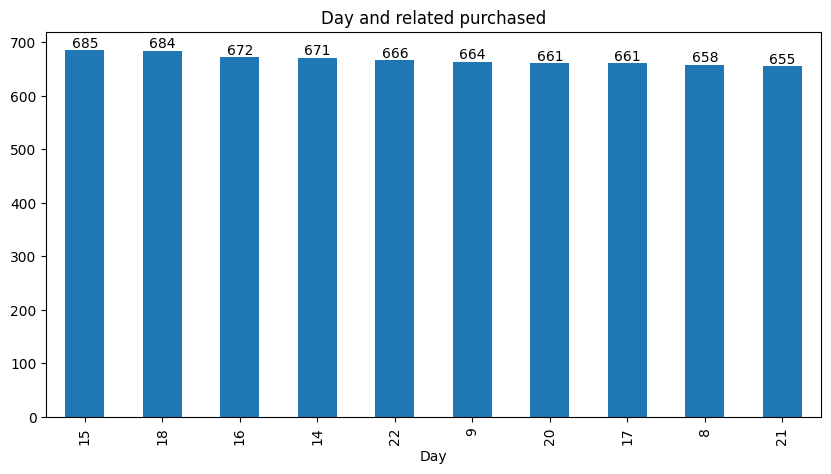

In [91]:
# Plotting the Day columns against bike related purchase for 3 years
plt.figure(figsize=(10,5))
ax=data.groupby(['Day'])['Day'].count().sort_values(ascending=False).head(10).plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('Day')
plt.title('Day and related purchased')

In [92]:
#deleting columns as it is less important to machine learning
data.drop(columns= ["product_class", "standard_cost", "postcode","property_valuation","order_status", "transaction_id",
                    "customer_id", "product_line", "transaction_date"], inplace=True)

In [93]:
data.head()

,gender,bike_sold,job_title,wealth_segment,owns_car,tenure,address,state,online_order,brand,product_size,Total_cost,Age,Month,Day
0,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,0.0,OHM Cycles,medium,38482.0,70.0,12,23
1,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,1.0,Solex,medium,39526.0,70.0,4,6
2,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,1.0,Trek Bicycles,small,37823.0,70.0,5,11
3,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,0.0,Norco Bicycles,medium,37873.0,70.0,1,5
4,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,0.0,Solex,medium,38573.0,70.0,2,21


In [94]:
data.shape

(19327, 15)

In [95]:
data.head()

,gender,bike_sold,job_title,wealth_segment,owns_car,tenure,address,state,online_order,brand,product_size,Total_cost,Age,Month,Day
0,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,0.0,OHM Cycles,medium,38482.0,70.0,12,23
1,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,1.0,Solex,medium,39526.0,70.0,4,6
2,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,1.0,Trek Bicycles,small,37823.0,70.0,5,11
3,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,0.0,Norco Bicycles,medium,37873.0,70.0,1,5
4,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,0.0,Solex,medium,38573.0,70.0,2,21


In [96]:
#save into customer.data
data.to_csv('customer.data', index= False)


Insight from above analysis
1. Maximum bike and related product that customer perfer is solex brand.
2. Customer who owns car buy more bike than those who dont own car
3. if they have tenure of 7 years they buy more bike related product
4. Largest bike releted product has more customer
5. Highest bike related sales is on product id 2 with 229 solds followed by product id 80 with 221 sold
6. In wealth segment column mass customer has highest bike related purchase with 8088 number and with solex brand as highest brand.
7. maximun customer are from 4297 Emmet Lane, Mariners Cove Terrace, 567 Scott Park, 8142 Tomscot Drive with 14 purchase followed by 9 Sugar Junction with 13 purchase.
8. Maximum customer order bike related product through online.
9. Almost all the order are approved.
10. maximum customer go for standard bike related product with 11591 numbers and minimun customer go for Mountain bike related product with 353 numbers
11. Maximum customer age is above 40 years old
12. Maximum customer are from New South Wales with 8585, VIC with 3665,   QLD with 3515 and finally with Victoria with 378
13. incase of postcode address maximum delivered to 2153 with 147 and followed by 3977 with 116
14. standard cost for bike related product is 255.1 and maximum purchase with price 388.92 for 379 followed by 325 for 954.82 price
15. Highest sale on bike related product was made on october month and lowest  on june.
16. maximum sale was made on 18day





Machine learning aHead

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [98]:
bike_sales= pd.read_csv("customer.data")
bike_sales.head()

,gender,bike_sold,job_title,wealth_segment,owns_car,tenure,address,state,online_order,brand,product_size,Total_cost,Age,Month,Day
0,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,0.0,OHM Cycles,medium,38482.0,70.0,12,23
1,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,1.0,Solex,medium,39526.0,70.0,4,6
2,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,1.0,Trek Bicycles,small,37823.0,70.0,5,11
3,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,0.0,Norco Bicycles,medium,37873.0,70.0,1,5
4,Female,93,Executive Secretary,Mass Customer,Yes,11.0,060 Morning Avenue,New South Wales,0.0,Solex,medium,38573.0,70.0,2,21


In [99]:
bike_sales.shape

(19327, 15)

In [100]:
bike_sales.drop(columns=['address', 'job_title'], inplace= True)
bike_sales.head()

,gender,bike_sold,wealth_segment,owns_car,tenure,state,online_order,brand,product_size,Total_cost,Age,Month,Day
0,Female,93,Mass Customer,Yes,11.0,New South Wales,0.0,OHM Cycles,medium,38482.0,70.0,12,23
1,Female,93,Mass Customer,Yes,11.0,New South Wales,1.0,Solex,medium,39526.0,70.0,4,6
2,Female,93,Mass Customer,Yes,11.0,New South Wales,1.0,Trek Bicycles,small,37823.0,70.0,5,11
3,Female,93,Mass Customer,Yes,11.0,New South Wales,0.0,Norco Bicycles,medium,37873.0,70.0,1,5
4,Female,93,Mass Customer,Yes,11.0,New South Wales,0.0,Solex,medium,38573.0,70.0,2,21


In [101]:
bike_sales.shape

(19327, 13)

In [102]:
#converting the gender columns into numeric of 0 and 1
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
bike_sales["gender"]= label_encoder.fit_transform(bike_sales["gender"])
bike_sales["wealth_segment"]= label_encoder.fit_transform(bike_sales["wealth_segment"])
bike_sales["owns_car"]= label_encoder.fit_transform(bike_sales["owns_car"])
bike_sales["state"]= label_encoder.fit_transform(bike_sales["state"])
bike_sales["brand"]= label_encoder.fit_transform(bike_sales["brand"])
bike_sales["product_size"]= label_encoder.fit_transform(bike_sales["product_size"])

In [103]:
#checking the info
bike_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          19327 non-null  int64  
 1   bike_sold       19327 non-null  int64  
 2   wealth_segment  19327 non-null  int64  
 3   owns_car        19327 non-null  int64  
 4   tenure          19327 non-null  float64
 5   state           19327 non-null  int64  
 6   online_order    19327 non-null  float64
 7   brand           19327 non-null  int64  
 8   product_size    19327 non-null  int64  
 9   Total_cost      19327 non-null  float64
 10  Age             19327 non-null  float64
 11  Month           19327 non-null  int64  
 12  Day             19327 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.9 MB


In [104]:
bike_sales['tenure']= bike_sales['tenure'].astype(int)
bike_sales['Total_cost']= bike_sales['Total_cost'].astype(int)
bike_sales['Age']= bike_sales['Age'].astype(int)
bike_sales['online_order']= bike_sales['online_order'].astype(int)
print(bike_sales.dtypes)

gender            int64
bike_sold         int64
wealth_segment    int64
owns_car          int64
tenure            int64
state             int64
online_order      int64
brand             int64
product_size      int64
Total_cost        int64
Age               int64
Month             int64
Day               int64
dtype: object


In [105]:
#checking the  info after changing to int
bike_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          19327 non-null  int64
 1   bike_sold       19327 non-null  int64
 2   wealth_segment  19327 non-null  int64
 3   owns_car        19327 non-null  int64
 4   tenure          19327 non-null  int64
 5   state           19327 non-null  int64
 6   online_order    19327 non-null  int64
 7   brand           19327 non-null  int64
 8   product_size    19327 non-null  int64
 9   Total_cost      19327 non-null  int64
 10  Age             19327 non-null  int64
 11  Month           19327 non-null  int64
 12  Day             19327 non-null  int64
dtypes: int64(13)
memory usage: 1.9 MB


In [106]:
#bike sales data frame to check statistical value
bike_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,19327.0,0.487349,0.499853,0.0,0.0,0.0,1.0,1.0
bike_sold,19327.0,48.937135,28.644584,0.0,24.0,48.0,73.0,99.0
wealth_segment,19327.0,1.256739,0.824194,0.0,1.0,2.0,2.0,2.0
owns_car,19327.0,0.501785,0.500010,0.0,0.0,1.0,1.0,1.0
tenure,19327.0,10.680499,5.672739,1.0,6.0,11.0,15.0,22.0
state,19327.0,0.741346,0.889415,0.0,0.0,0.0,2.0,3.0
online_order,19327.0,0.491644,0.499943,0.0,0.0,0.0,1.0,1.0
brand,19327.0,2.533399,1.685849,0.0,1.0,3.0,4.0,5.0
product_size,19327.0,0.942153,0.583383,0.0,1.0,1.0,1.0,2.0
Total_cost,19327.0,38202.130025,2873.717860,33259.0,35667.0,38216.0,40672.0,42710.0


In [107]:
#separating the target variable from rest
y= bike_sales["bike_sold"].head()
y

0    93
1    93
2    93
3    93
4    93
Name: bike_sold, dtype: int64

In [108]:
#creating x variable(independent variable) and y is dependable variable (bike sold variable)
#drop dependent varible bike sold columns
x= bike_sales.drop(columns= 'bike_sold', axis= 1)
x

,gender,wealth_segment,owns_car,tenure,state,online_order,brand,product_size,Total_cost,Age,Month,Day
0,0,2,1,11,0,0,2,1,38482,70,12,23
1,0,2,1,11,0,1,3,1,39526,70,4,6
2,0,2,1,11,0,1,4,2,37823,70,5,11
3,0,2,1,11,0,0,1,1,37873,70,1,5
4,0,2,1,11,0,0,3,1,38573,70,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...
19322,0,0,0,17,0,1,0,1,33879,56,1,9
19323,0,0,0,17,0,0,5,1,36668,56,2,16
19324,0,0,0,17,0,0,0,2,33888,56,8,8
19325,0,0,0,17,0,0,5,1,34165,56,1,11


In [109]:
#create y variable
y= bike_sales['bike_sold']
y

0        93
1        93
2        93
3        93
4        93
         ..
19322    71
19323    71
19324    71
19325    71
19326    71
Name: bike_sold, Length: 19327, dtype: int64

In [110]:
#spliting the data into test and train data. 80% train data and 20 % testing data and random state is 2, stratisfy is y
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=2, stratify=y)

In [111]:
#checking the shape of x, x_train and x_test shape
print(x.shape, x_train.shape, x_test.shape)

(19327, 12) (15461, 12) (3866, 12)


In [112]:
#checking the dataset for y_train
# Found the imbalance Dataset
y_train.value_counts()

16    223
80    213
2     201
13    200
19    198
     ... 
3     102
92     94
85     90
86     85
8      84
Name: bike_sold, Length: 100, dtype: int64

In [113]:
#checking the value of y
y.value_counts()

16    279
80    267
2     252
13    250
19    248
     ... 
3     127
92    117
85    113
86    106
8     105
Name: bike_sold, Length: 100, dtype: int64

Applying Smote For Imbalance DataSet

In [114]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

In [115]:
#droping the attrition columns from x
#y contain only attrition column
x= bike_sales.drop('bike_sold', axis= 'columns')
y=bike_sales['bike_sold']

In [116]:
#create smote for imbalance dataset
#create the object of the class as smote
# fitting the x and y in smote
smote= SMOTE(sampling_strategy='minority')
x_sm, y_sm= smote.fit_resample(x, y)

In [117]:
#checking the value count of y_sm
#finds dataset is balance now
y_sm.value_counts()

8     279
16    279
80    267
2     252
13    250
     ... 
95    132
3     127
92    117
85    113
86    106
Name: bike_sold, Length: 100, dtype: int64

In [118]:
#creating x_train, y_train, x_test, and x_test
x_train, x_test, y_train, y_test= train_test_split(x_sm, y_sm, test_size= 0.2, random_state=2, stratify=y_sm)

In [119]:
#checking the y_test and y_train data set
#finds the same number of dataset for 0 and 1
print(y_train.value_counts())
print(y_test.value_counts())

16    223
8     223
80    213
2     201
13    200
     ... 
95    106
3     102
92     94
85     90
86     85
Name: bike_sold, Length: 100, dtype: int64
16    56
8     56
80    54
2     51
19    50
      ..
95    26
3     25
92    23
85    23
86    21
Name: bike_sold, Length: 100, dtype: int64


In [120]:
scaler = StandardScaler()
scaler_x_train= scaler.fit_transform(x_train)
scaler_x_test= scaler.fit_transform(x_test)

In [121]:
def modeleresult(prediction):
  print("mean absolute error on model is {}".format(mean_absolute_error(y_test, prediction)))
  print("mean squared error in this model is {}".format(np.sqrt(mean_squared_error(y_test, prediction))))



In [122]:
model = LinearRegression()

In [123]:
reg = model.fit(x_train,y_train)

In [124]:
y_pred = reg.predict(x_test)

In [125]:
y_pred

array([46.43022265, 50.47340697, 49.357144  , ..., 47.46693367,
       48.1154619 , 49.70397359])

In [126]:
modeleresult(y_pred)

mean absolute error on model is 24.911527981609375
mean squared error in this model is 28.824182250698648


In [127]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.0024881811669683618

Model Train Using Random Forest Tree

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfrmodel= RandomForestRegressor()

In [129]:
param_gridrfr= {"bootstrap": [True], "max_depth":[5, 10, 15], "max_features": ["auto", "log2"],"n_estimators": [3,4,5,6,7]}

In [130]:
gridrfr= GridSearchCV(rfrmodel, param_gridrfr)

In [131]:
gridrfr.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [3, 4, 5, 6, 7]})

In [132]:
print("the best model is {}".format(gridrfr.best_params_))

the best model is {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 6}


In [133]:
predgridrfr= gridrfr.predict(scaler_x_test)

In [134]:
modeleresult(predgridrfr)

mean absolute error on model is 26.627771511578228
mean squared error in this model is 31.6163355270613
